In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('selected_features_without_text.csv')

In [3]:
df = df.drop(columns=["Unnamed: 0","reviewID", "restaurantID"])

In [4]:
df['reviewRating_1'] = df['reviewRating_1'].astype(int)
df['reviewRating_2'] = df['reviewRating_2'].astype(int)
df['reviewRating_3'] = df['reviewRating_3'].astype(int)
df['reviewRating_4'] = df['reviewRating_4'].astype(int)
df['reviewRating_5'] = df['reviewRating_5'].astype(int)

In [5]:
X = df.drop(['flagged'], axis=1) 
y = df.flagged

In [6]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [7]:
X_train = X_train.drop(['reviewerID'], axis = 1)

In [8]:
X_test = X_test.drop(['reviewerID'], axis = 1)

In [9]:
X_train

,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5
1,0.000000,0.001149,0.000000,841,4.5,0.183244,0.031250,0.068376,0.466667,0.566667,0.263158,0,0,0,0,1
2,0.000425,0.003831,0.000276,841,4.5,0.565800,0.028125,0.042735,0.413333,0.720000,0.473684,0,0,1,0,0
3,0.017850,0.022605,0.001609,841,4.5,0.689365,0.262500,0.290598,0.120548,0.535201,0.868421,0,0,1,0,0
4,0.070761,0.462835,0.075869,841,4.5,0.725708,0.090625,0.170940,0.167460,0.564683,0.868421,0,0,0,0,1
5,0.012537,0.020307,0.003127,841,4.5,0.430375,0.234375,0.324786,0.177801,0.458819,0.868421,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26947,0.006162,0.009962,0.001885,18,4.5,0.222265,0.137500,0.085470,0.236429,0.519524,0.763158,0,0,0,0,1
26949,0.002125,0.003065,0.000368,14,4.0,0.170620,0.015625,0.034188,0.460000,0.490000,0.342105,0,0,0,0,1
26951,0.006587,0.062835,0.009242,14,4.0,0.553175,0.050000,0.051282,0.226623,0.760173,0.763158,0,0,0,1,0
26952,0.001275,0.003831,0.000322,15,4.0,0.598317,0.053125,0.076923,0.269271,0.608333,0.894737,0,0,0,0,1


In [10]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/100
672/672 [==============================] - 1s 1ms/step - loss: 1.7021 - recall: 0.1534 - val_loss: 0.7447 - val_recall: 0.0025
Epoch 2/100
672/672 [==============================] - 1s 958us/step - loss: 0.5488 - recall: 0.2075 - val_loss: 0.5349 - val_recall: 0.0209
Epoch 3/100
672/672 [==============================] - 1s 961us/step - loss: 0.5626 - recall: 0.2780 - val_loss: 0.5522 - val_recall: 0.0351
Epoch 4/100
672/672 [==============================] - 1s 910us/step - loss: 0.5448 - recall: 0.3098 - val_loss: 0.5718 - val_recall: 0.0351
Epoch 5/100
672/672 [==============================] - 1s 894us/step - loss: 0.5138 - recall: 0.3395 - val_loss: 0.5843 - val_recall: 0.9056
Epoch 6/100
672/672 [==============================] - 1s 900us/step - loss: 0.5082 - recall: 0.3659 - val_loss: 2.1779 - val_recall: 0.9967
Epoch 7/100
672/672 [==============================] - 1s 907us/step - loss: 0.5459 - recall: 0.3667 - val_loss: 1.2733 - val_recall: 0.9774
Epoch 8/100
672

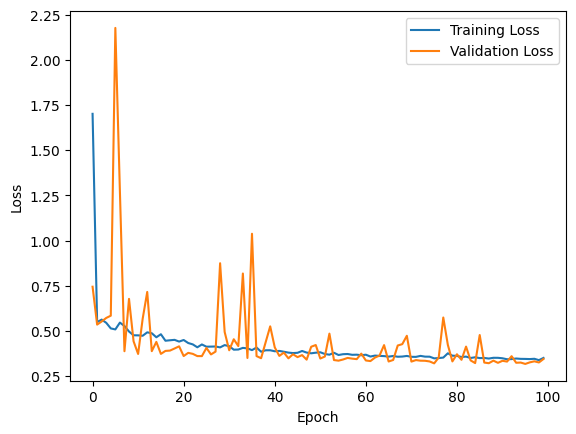

In [11]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/80
672/672 [==============================] - 1s 1ms/step - loss: 1.1523 - recall: 0.0981 - val_loss: 0.7257 - val_recall: 0.0000e+00
Epoch 2/80
672/672 [==============================] - 1s 964us/step - loss: 0.5721 - recall: 0.1718 - val_loss: 0.4487 - val_recall: 0.0894
Epoch 3/80
672/672 [==============================] - 1s 926us/step - loss: 0.5780 - recall: 0.2339 - val_loss: 0.4617 - val_recall: 0.3626
Epoch 4/80
672/672 [==============================] - 1s 945us/step - loss: 0.5092 - recall: 0.2325 - val_loss: 0.4307 - val_recall: 0.3150
Epoch 5/80
672/672 [==============================] - 1s 969us/step - loss: 0.4929 - recall: 0.2786 - val_loss: 0.8109 - val_recall: 0.9624
Epoch 6/80
672/672 [==============================] - 1s 1ms/step - loss: 0.5069 - recall: 0.3000 - val_loss: 0.4779 - val_recall: 0.0568
Epoch 7/80
672/672 [==============================] - 1s 970us/step - loss: 0.4836 - recall: 0.3307 - val_loss: 0.5741 - val_recall: 0.0309
Epoch 8/80
672/672 [

  1/672 [..............................] - ETA: 19s

672/672 [==============================] - 0s 564us/step


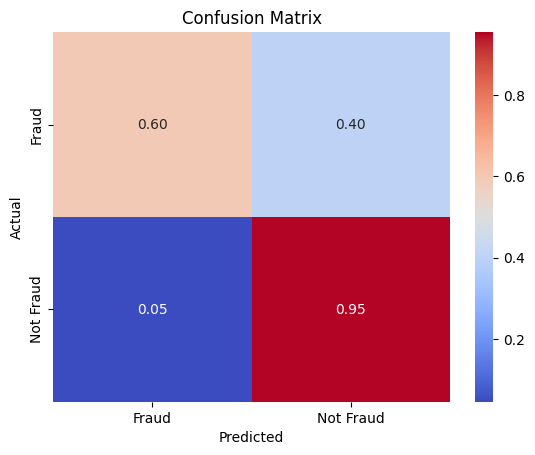

Confusion Matrix:
[[0.59616202 0.40383798]
 [0.04513681 0.95486319]]
Accuracy: 0.6797988264878457
Precision: 0.41824862216778935
Recall: 0.9548631915318554
F1-Score: 0.5817009368536319


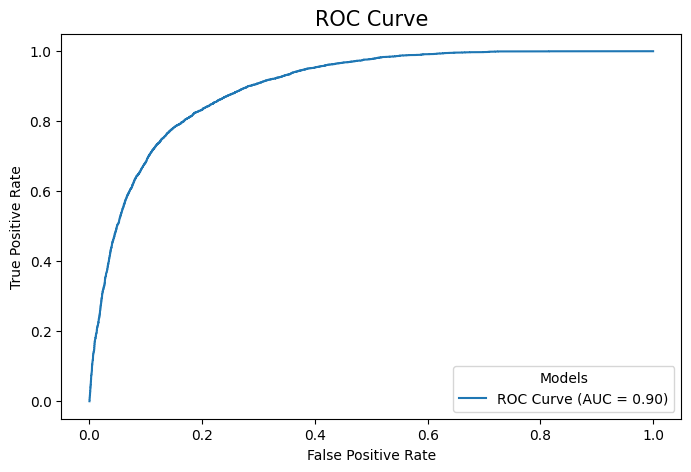

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

y_pred = model.predict(X_train)

y_pred_binary = (y_pred > 0.10).astype(int)  # Adjust threshold as needed

# Convert y_test to binary (if it's not already)
y_train_binary = (y_train > 0.10).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_train_binary, y_pred_binary,normalize = 'true')
sns.heatmap(conf_matrix,annot=True,fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_train_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_train_binary, y_pred_binary)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_train_binary, y_pred_binary)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_train_binary, y_pred_binary)
print(f"F1-Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_train_binary, y_pred)
auc = roc_auc_score(y_train_binary, y_pred)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.show()


172/172 [==============================] - 0s 502us/step


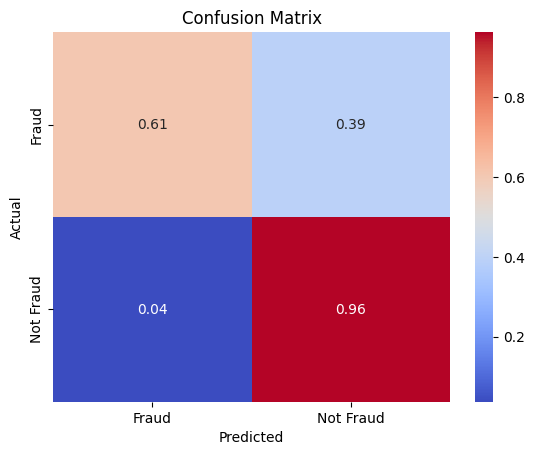

Confusion Matrix:
[[0.60676779 0.39323221]
 [0.03675856 0.96324144]]
Accuracy: 0.6846041590660343
Precision: 0.4062720225510923
Recall: 0.9632414369256475
F1-Score: 0.5714993804213134


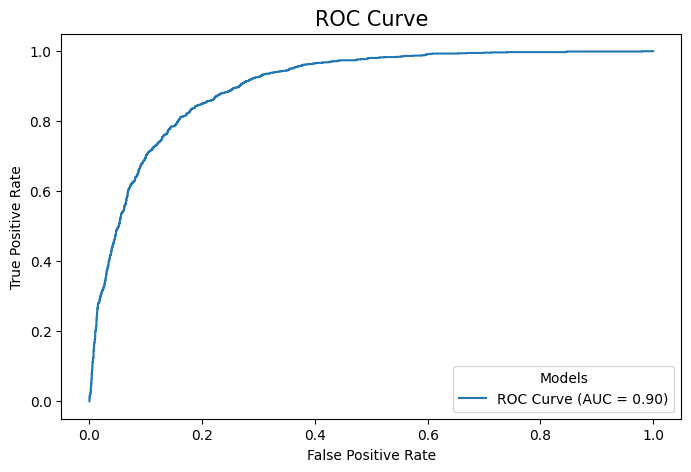

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.10).astype(int)  # Adjust threshold as needed

# Convert y_test to binary (if it's not already)
y_test_binary = (y_test > 0.10).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary,normalize = 'true')
sns.heatmap(conf_matrix,annot=True,fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1-Score: {f1}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
auc = roc_auc_score(y_test_binary, y_pred)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.show()
